In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Signal Detection Theory.

Consider an experiment where a moving-dot visual stimulus is presented to a subject. The difficulty of detecting the motion is varied by changing the coherence of the moving dots, which is the fraction of dots moving to the right (at zero coherence, the dots move randomly, and at 100% coherence, all of the dots move to the right). Suppose we want to decide whether the stimulus is random or is moving to the right, based on the response of a single neuron that fires at a random rate, whose mean is 3 spikes/s in response to a 0% coherence noisy stimulus and 5 spikes/s for 10% coherence. Suppose also that the distribution of firing rates is Gaussian with a standard deviation of 1 spikes/s for both stimuli.

---

# a)

For the “no coherence” stimulus, generate 1000 trials of the firing rate of the neuron in response to these stimuli (i.e., draw 1000 random samples from a Gaussian with $μ = 3$ and $σ = 1$). Since we cannot have negative firing rates, set all rates that are below zero to zero. Now do the same thing for the 10% coherence stimulus. On the same figure, plot the histograms of the firing rates for each stimulus type.

In [2]:
fr_0 = np.random.randn(1000) + 3
fr_10 = np.random.randn(1000) + 5
fr_0[fr_0 < 0] = 0
fr_10[fr_10 < 0] = 0

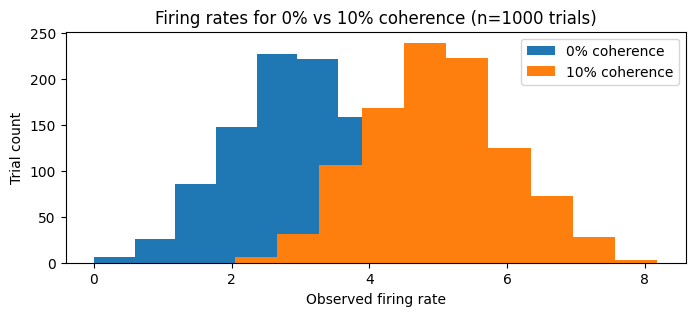

In [3]:
plt.subplots(figsize=(8, 3))
plt.title('Firing rates for 0% vs 10% coherence (n=1000 trials)')
plt.hist(fr_0, label='0% coherence')
plt.hist(fr_10, label='10% coherence')
plt.xlabel('Observed firing rate')
plt.ylabel('Trial count')
plt.legend()
plt.show()

# b)

The success of the decoder (assuming this model of Gaussian noise) is determined by two things, the separation of the mean firing rates and the standard deviation of the neuron. From class, we know that this is captured in the measure known as $d'$. Calculate $d'$ for this task and pair of stimuli (ignoring the fact that you are clipping firing rates at zero).

$d'$ is the distance between the two means in units of standard deviations. Stimulus 1 (0% coherence) has a mean of 3 and standard deviation of 1, while stimulus 2 (10% coherence) has a mean of 5 and standard deviation 1. So

$d' = \frac{5 - 3}{1} = 2$.

Measured emperically,

In [4]:
avg_std = 1/2 * (np.std(fr_0) + np.std(fr_10))
(np.mean(fr_10) - np.mean(fr_0)) / avg_std

1.9995877886983489

---

# c)

Explain why the maximum likelihood decoder for this problem involves comparing the measurement to a threshold. For various thresholds t, calculate the hit and false-alarm rates using your sample data from (a), and plot these against each other (this is an ROC curve, defined in class).

This decoder tries to guess from which of two Gaussian-distributed random variables a sample was drawn. It does this by comparing the likelihood of drawing that sample from each of the two distributions. For equal-shape, unimodal, symmetric distributions, the ML decision rule can be expressed as a threshold function. This problem is one such problem: the firing rate distributions for 0% and 10% coherence are unimodal and symmetric (since they are Gaussians) and equal shape (since they have the same standard deviation).

In [5]:
thresholds = np.linspace(0, 10, 1000)
n_hits = []
n_fps = []
for t in thresholds:
    n_hits.append(np.sum(fr_10 > t))
    n_fps.append(np.sum(fr_0 > t))

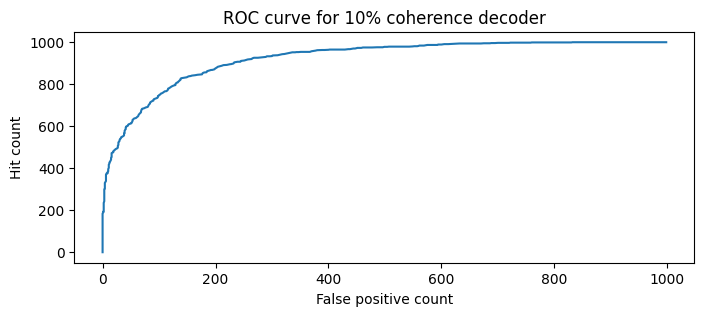

In [6]:
plt.subplots(figsize=(8, 3))
plt.title('ROC curve for 10% coherence decoder')
plt.plot(n_fps, n_hits)
plt.xlabel('False positive count')
plt.ylabel('Hit count')
plt.show()

What threshold would you pick based on this curve to maximize the percentage-correct of the decoder, assuming that 0% and 10% coherence stimuli occur equally often. Plot this threshold as a point on the ROC curve and as a vertical line on your histogram from part (a).

Assuming 0% and 10% coherence stimuli occur equally often is a uniform prior. In this case the posterior is directly proportional to the likelihood. Since both likelihoods are equal-shaped, unimodal and symmetric, the optimal threshold lies exactly between them at the firing rate $4$ spikes/s.

Numerically, we can find it for our dataset by picking the threshold that maximizes hit rate minus false-positive rate:

In [7]:
thresholds[np.argmax(np.array(n_hits) - np.array(n_fps))]

4.044044044044044

In [8]:
hits = np.sum(fr_10 > 4.024)
fps = np.sum(fr_0 > 4.024)
hits, fps

(833, 149)

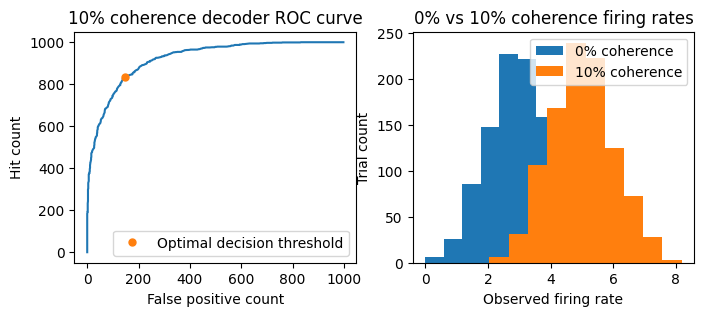

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
plt.sca(axs[0])
plt.title('10% coherence decoder ROC curve')
plt.plot(n_fps, n_hits)
plt.plot(fps, hits, '.', markersize=10, label='Optimal decision threshold')
plt.xlabel('False positive count')
plt.ylabel('Hit count')
plt.legend()
plt.sca(axs[1])
plt.title('0% vs 10% coherence firing rates')
plt.hist(fr_0, label='0% coherence')
plt.hist(fr_10, label='10% coherence')
plt.xlabel('Observed firing rate')
plt.ylabel('Trial count')
plt.legend()
plt.show()

Next, suppose that 10% coherence stimuli occur 75% of the time. Determine and plot the threshold that maximizes percentage correct for this new prior.

Denote 10% coherence by $S + N$ (signal plus noise), 0% coherence by $N$ (noise), and firing rate by $x$. Then

$P(S + N) = 0.75$

$P(N) = 0.25$

$P(x|S + N) = \mathcal{N}(\mu=5, \sigma=1)$

$P(x|N) = \mathcal{N}(\mu=3, \sigma=2)$.

Our optimality criterion is to say yes if 

$\frac{P(S + N|x)}{P(N|x)} >= 1$

So our decision threshold should lie at the $x$ satisfies $P(S+N|x) = P(N|X)$.

Bayes rule says $P(S+N|x) = \frac{P(x|S+N)P(S+N)}{P(x)}$ and $P(N|x) = \frac{P(x|N)P(N)}{P(x)}$,

so we can write the equation for our decision rule as

$P(x|S+N)P(S+N) = P(x|N)P(N)$. More explicitly,

$0.75 \times e^{\frac{-(x - 5)^2}{2}} = 0.25 \times e^{\frac{-(x - 3)^2}{2}}$. Solving for $x$,

$\ln 0.75 - \frac{1}{2}(x - 5)^2 = \ln 0.25 - \frac{1}{2}(x - 3)^2$

$\ln 3 - \frac{1}{2}(x^2 - 10x + 25) = - \frac{1}{2}(x^2 - 6x + 9)$

$4x = 16 - 2\ln3$

$x = 4 - \frac{1}{2} \ln 3$.

We can interpret this result as taking the decision threshold $x=4$ with an equal prior and adjusting it by the term $-\frac{1}{2} \ln 3$, where $\ln 3$ is the log-odds by which we re-weighted the prior ($0.75:0.25$).

In [10]:
t_opt = 4 - (1/2) * np.log(3)
t_opt

3.450693855665945

In [11]:
def norm_pdf(x, mu, sigma):
    const = 1 / (np.sqrt(2 * np.pi) * sigma)
    y = const * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return y / np.sum(y)

In [12]:
x = np.linspace(0, 10, 1000)
p_n = 0.25 * norm_pdf(x, mu=3, sigma=1)
p_sn = 0.75 * norm_pdf(x, mu=5, sigma=1)

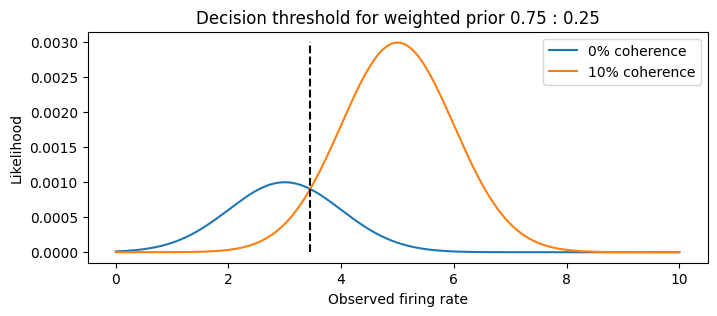

In [13]:
plt.subplots(figsize=(8, 3))
plt.title('Decision threshold for weighted prior 0.75 : 0.25')
plt.plot(x, p_n, label='0% coherence')
plt.plot(x, p_sn, label='10% coherence')
plt.vlines(t_opt, 0, 0.003, 'k', '--')
plt.xlabel('Observed firing rate')
plt.ylabel('Likelihood')
plt.legend()
plt.show()

---

# d)

Consider now a neuron with a more ”noisy” response so that the mean firing rates are the same but the standard deviation is 2 spikes/s instead of 1 spike/s. What is the new value of d′. Recompute and plot the optimal (maximum accuracy) thresholds for this noisy neuron for both the 50-50 and 75-25 priors. How do they differ from those in the previous part?

In [14]:
fr_0 = 2 * np.random.randn(1000) + 3
fr_10 = 2 * np.random.randn(1000) + 5
fr_0[fr_0 < 0] = 0
fr_10[fr_10 < 0] = 0

The new value of $d'$ for our model is $\frac{5 - 3}{2} = 1$. Empirically:

In [15]:
avg_std = 1/2 * (np.std(fr_0) + np.std(fr_10))
(np.mean(fr_10) - np.mean(fr_0)) / avg_std

1.0698058736842155

Compute the optimal threshold for the 50-50 priors:

In [16]:
n_hits = []
n_fps = []
for t in thresholds:
    n_hits.append(np.sum(fr_10 > t))
    n_fps.append(np.sum(fr_0 > t))

t_opt = thresholds[np.argmax(np.array(n_hits) - np.array(n_fps))]
t_opt

4.2542542542542545

In [17]:
x = np.linspace(0, 10, 1000)
p_n = norm_pdf(x, mu=3, sigma=2)
p_sn = norm_pdf(x, mu=5, sigma=2)

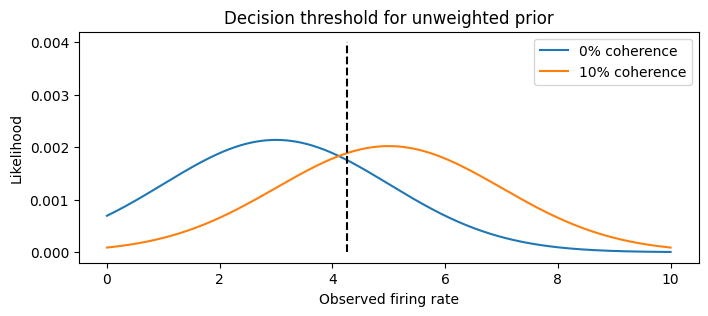

In [18]:
plt.subplots(figsize=(8, 3))
plt.title('Decision threshold for unweighted prior')
plt.plot(x, p_n, label='0% coherence')
plt.plot(x, p_sn, label='10% coherence')
plt.vlines(t_opt, 0, 0.004, 'k', '--')
plt.xlabel('Observed firing rate')
plt.ylabel('Likelihood')
plt.legend()
plt.show()

For the 75-25 prior, we follow the same calculation as in (c). The equation for our decision rule is

$P(x|S+N)P(S+N) = P(x|N)P(N)$. Specifically,

$0.75 \times e^{\frac{-(x - 5)^2}{8}} = 0.25 \times e^{\frac{-(x - 3)^2}{8}}$. Solving for $x$,

$\ln 0.75 - \frac{1}{8}(x - 5)^2 = \ln 0.25 - \frac{1}{8}(x - 3)^2$

$\ln 3 - \frac{1}{8}(x^2 - 10x + 25) = - \frac{1}{8}(x^2 - 6x + 9)$

$4x = 16 - 8\ln3$

$x = 4 - 2 \ln 3$.

In [19]:
t_opt = 4 - 2 * np.log(3)
t_opt

1.8027754226637804

In [20]:
x = np.linspace(0, 10, 1000)
p_n = 0.25 * norm_pdf(x, mu=3, sigma=2)
p_sn = 0.75 * norm_pdf(x, mu=5, sigma=2)

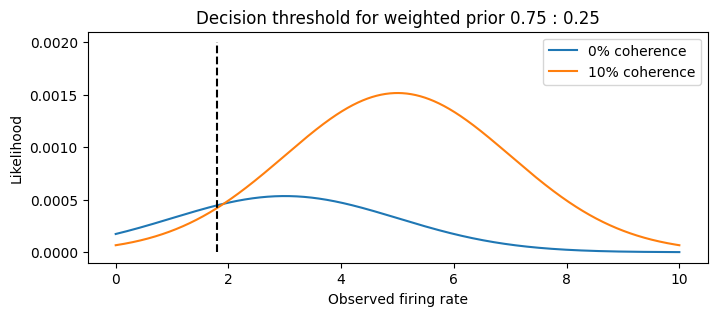

In [21]:
plt.subplots(figsize=(8, 3))
plt.title('Decision threshold for weighted prior 0.75 : 0.25')
plt.plot(x, p_n, label='0% coherence')
plt.plot(x, p_sn, label='10% coherence')
plt.vlines(t_opt, 0, 0.002, 'k', '--')
plt.xlabel('Observed firing rate')
plt.ylabel('Likelihood')
plt.legend()
plt.show()

In the unweighted case, the optimal decision threshold stays as before. However, since $d'$ is lower than before (due to decreased variance) the decoder accuracy will degrade somewhat compared to before (area under the ROC curve will be lower).

In the weighted case, something interesting happens: the optimal decision threshold actually goes _below_ 3, the mean firing rate for noise. Even if we observe a firing rate slightly less than 3 (e.g. 2), the decoder will classify the observation as 10% coherence due to its 75% prior weighting. The firing rate actually needs to be lower than 1.802 for the decoder to classify the observation as noise.